In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, lambertw

from qiskit import Aer, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram

from qsp import (
    ancilla_free_qsp_circuit, run_ancilla_free_qsp, 
    single_ancilla_qsp_circuit, run_single_ancilla_qsp,
    lcu_circuit, run_lcu, to_single_ancilla_qsp_angles,
)

## Ancilla-free QSP
$$\mathcal{A}(2 \theta) + i \mathcal{C}(2 \theta) = \langle + | e^{i \phi_0 Z} e^{i \theta X} e^{i \phi_1 Z} \cdots e^{i \theta X} e^{i \phi_d Z} | + \rangle,$$
where $x = \cos \frac{\theta}{2}$.

QSP phases for odd polynomial function given in APPENDIX. D3 and FIG. 22 [PRX QUANTUM 2, 040203 (2021)]

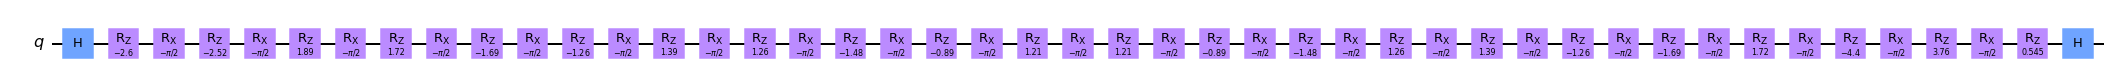

In [2]:
angles = [-0.27237279, -1.8808697, 2.19755533, -0.860515, 0.84659086, 0.62794236, -0.69688032, -0.62874403, 0.7406656, 0.44483992, -0.60489363, -0.60489363, 0.44483992, 0.7406656, -0.62874403, -0.69688032, 0.62794236, 0.84659086, -0.860515, -0.94403733, 1.26072295, 1.29842354]
qc = ancilla_free_qsp_circuit(np.pi / 2, angles, basis="X")
qc.draw(output="mpl", fold=-1)

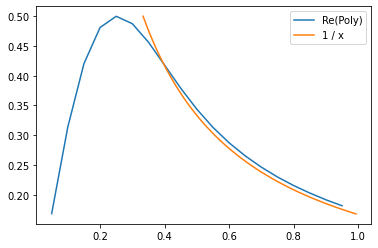

In [3]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
p0 = [run_ancilla_free_qsp(t, angles, basis="X", simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]

plt.plot(xs, amp, label="Re(Poly)")
kappa = 3
x = np.arange(1 / kappa, 1.0, 0.01)
plt.plot(x, [0.5 / kappa / x for x in x], label="1/x")
plt.legend(["Re(Poly)", "1 / x"])
plt.show()

### $\mathcal{A}(\theta) = \mathcal{A}(-\theta)$ and $\mathcal{C}(\theta) = \mathcal{C}(-\theta)$

In [4]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
amps = [run_ancilla_free_qsp(t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])
amps = [run_ancilla_free_qsp(- t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])

[(0.168+0j), (0.314-0j), (0.42-0j), (0.481-0j), (0.5-0j), (0.487-0j), (0.456-0j), (0.418+0j), (0.379+0j), (0.344+0j), (0.313+0j), (0.287+0j), (0.265+0j), (0.246+0j), (0.23+0j), (0.215+0j), (0.203+0j), (0.192+0j), (0.182-0j)]
[(0.168-0j), (0.314+0j), (0.42+0j), (0.481+0j), (0.5+0j), (0.487+0j), (0.456+0j), (0.418-0j), (0.379-0j), (0.344-0j), (0.313-0j), (0.287-0j), (0.265-0j), (0.246-0j), (0.23-0j), (0.215-0j), (0.203-0j), (0.192-0j), (0.182+0j)]


## Single-ancilla QSP
$$\mathcal{A}(\theta) + i \mathcal{C}(\theta) = (\langle + | \otimes \langle +i |) V^{\dagger}_{\phi_0 + \pi} V_{\phi_0} \cdots V_{\phi_{d-1}} (| + \rangle | +i \rangle) = \langle + | e^{i \phi_0 Z} e^{i \frac{\theta}{2} X} e^{i \phi_1 Z} \cdots e^{i \frac{\theta}{2} X} e^{i \phi_d Z} | + \rangle,$$
where $x = \cos \theta$.

QSP phases for odd polynomial function given in APPENDIX. D3 and FIG. 22 [PRX QUANTUM 2, 040203 (2021)]

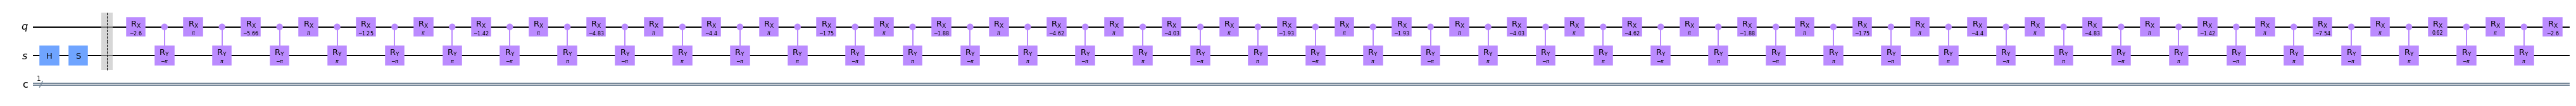

In [5]:
sa_angles = to_single_ancilla_qsp_angles(angles)
qc = single_ancilla_qsp_circuit(np.pi / 2, sa_angles)
qc.draw(output="mpl", fold=-1)

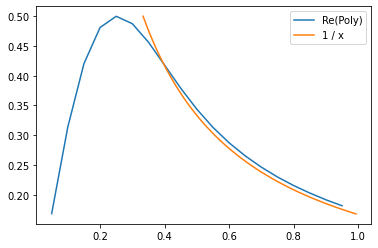

In [6]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - np.arccos(xs)
p0 = [run_single_ancilla_qsp(t, sa_angles, simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]

plt.plot(xs, amp, label="Re(Poly)")
kappa = 3
x = np.arange(1 / kappa, 1.0, 0.01)
plt.plot(x, [0.5 / kappa / x for x in x], label="1/x")
plt.legend(["Re(Poly)", "1 / x"])
plt.show()

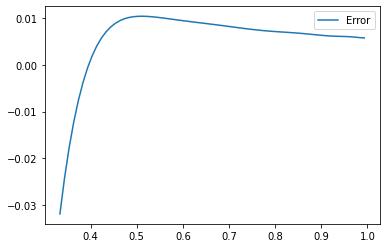

In [7]:
xs = np.arange(1 / kappa, 1.0, 0.01)
ts = - np.arccos(xs)
p0 = [run_single_ancilla_qsp(t, sa_angles, simulator="aer_simulator_statevector") for t in ts]
amp = np.array([np.sqrt(p) for p in p0])
fs = 0.5 / (kappa * xs)
plt.plot(xs, amp - fs, label="Re(Poly)")
plt.legend(["Error"])
plt.show()

## Ancilla-free QSP
$f(x)$ is an odd polynomial function that $\epsilon$-approximates 
$$f(x) \approx \frac{1 - e^{- \beta^2 x^2}}{a x} \approx \frac{1}{a x},$$
for $\kappa = 3$, $\epsilon = 10^{-3}$, and $a = 9.210428748675136$.

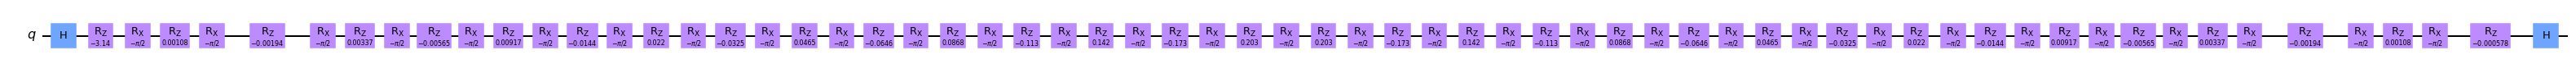

In [9]:
angles = [
    2.88812025e-04, -5.41808168e-04,  9.72369412e-04, -1.68410045e-03,
    2.82320539e-03, -4.58506664e-03,  7.21546376e-03, -1.10026797e-02,
    1.62568213e-02, -2.32736533e-02,  3.22820199e-02, -4.33762436e-02,
    5.64378218e-02, -7.10554661e-02,  8.64612603e-02, -1.01514193e-01,
    -1.01514193e-01,  8.64612603e-02, -7.10554661e-02,  5.64378218e-02,
    -4.33762436e-02,  3.22820199e-02, -2.32736533e-02,  1.62568213e-02,
    -1.10026797e-02,  7.21546376e-03, -4.58506664e-03,  2.82320539e-03,
    -1.68410045e-03,  9.72369412e-04, -5.41808168e-04,  1.57108514e+00,
]

qc = ancilla_free_qsp_circuit(np.pi / 2, angles, basis="X")
qc.draw(output="mpl", fold=-1)

In [10]:
def g(x):
    kappa = 3.0
    eps = 1e-3
    s = 0.638172686338950
    beta = np.exp(- lambertw(1 / (2 * s ** 2 * eps ** 2)) / 2) * kappa / (2 * s * eps)
    a = 2 * s * beta.real
    return (1 - np.exp(- (beta.real * x) ** 2)) / (a * x)

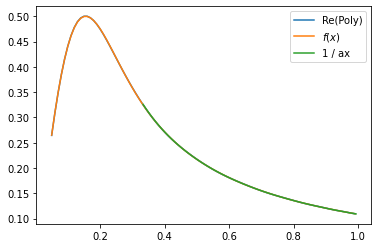

In [11]:
xs = np.arange(0.05, 1.0, 0.01)
ts = - 2 * np.arccos(xs)
p0 = [run_ancilla_free_qsp(t, angles, basis="X", simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]
plt.plot(xs, amp, label="Re(Poly)")

plt.plot(xs, g(xs), label="1 / ax")
kappa = 3.0
a = 9.210428748675136
xs = np.arange(1 / kappa, 1.0, 0.01)
plt.plot(xs, 1 / (a * xs), label="1 / ax")
plt.legend(["Re(Poly)", "$f(x)$", "1 / ax"])
plt.show()

### $\mathcal{A}(\theta) = \mathcal{A}(-\theta)$ and $\mathcal{C}(\theta) = \mathcal{C}(-\theta)$

In [12]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
amps = [run_ancilla_free_qsp(t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])
amps = [run_ancilla_free_qsp(- t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])

[(0.264-0j), (0.441+0j), (0.5+0j), (0.475-0j), (0.417+0j), (0.359+0j), (0.31-0j), (0.271-0j), (0.241+0j), (0.217+0j), (0.197-0j), (0.181-0j), (0.167+0j), (0.155-0j), (0.145-0j), (0.136+0j), (0.128-0j), (0.121+0j), (0.114-0j)]
[(0.264+0j), (0.441-0j), (0.5-0j), (0.475+0j), (0.417-0j), (0.359-0j), (0.31+0j), (0.271+0j), (0.241-0j), (0.217-0j), (0.197+0j), (0.181+0j), (0.167-0j), (0.155+0j), (0.145+0j), (0.136-0j), (0.128+0j), (0.121-0j), (0.114+0j)]


## Single-ancilla QSP
QSP phases for odd polynomial function

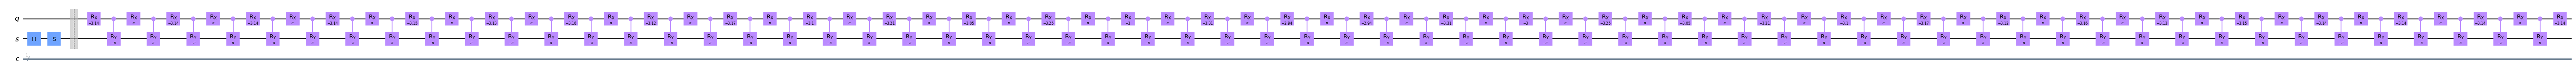

In [13]:
sa_angles = to_single_ancilla_qsp_angles(angles)
qc = single_ancilla_qsp_circuit(np.pi / 2, sa_angles)
qc.draw(output="mpl", fold=-1)

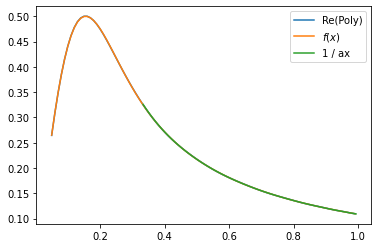

In [14]:
xs = np.arange(0.05, 1.0, 0.01)
ts = - np.arccos(xs)
p0 = [run_single_ancilla_qsp(t, sa_angles, simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]
plt.plot(xs, amp, label="Re(Poly)")

plt.plot(xs, g(xs), label="1 / ax")
kappa = 3.0
a = 9.210428748675136
xs = np.arange(1 / kappa, 1.0, 0.01)
plt.plot(xs, 1 / (a * xs), label="1 / ax")
plt.legend(["Re(Poly)", "$f(x)$", "1 / ax"])
plt.show()

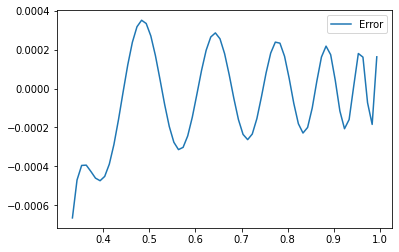

In [15]:
xs = np.arange(1 / kappa, 1.0, 0.01)
ts = - np.arccos(xs)
p0 = [run_single_ancilla_qsp(t, sa_angles, simulator="aer_simulator_statevector") for t in ts]
amp = np.array([np.sqrt(p) for p in p0])
gs = 1 / (a * xs)
plt.plot(xs, amp - gs, label="Re(Poly)")
plt.legend(["Error"])
plt.show()

## Ancilla-free QSP
$f(x)$ is an even polynomial function that $\epsilon$-approximates 
$$f(x) \approx \frac{\pi}{24 x},$$
for $\kappa = 3$.

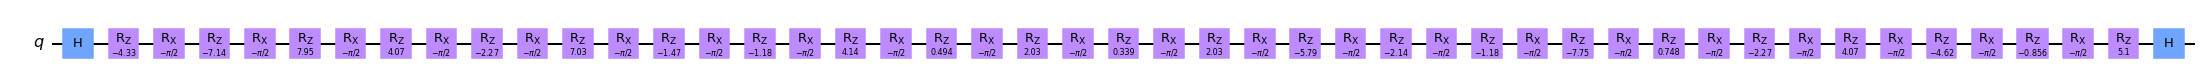

In [16]:
angles = [
    -2.5481255334285531,  0.4277601851098368,  2.3086408611540499,
    -2.0329181128165765,  1.1327197793073169, -0.3739308078738605,
     3.8767901690211120,  0.5906969541336257,  1.0713403943442550,
     2.8945960015784258, -1.0167176012488488, -0.1695681535011868,
    -1.0167176012481571, -0.2469966520098462, -2.0702522592436425,
     0.5906969541346488,  0.7351975154308896, -3.5155234614603761,
     1.1327197793090218, -2.0329181128206004, -3.9745444460287733,
     3.5693528386976605,  2.1642634469556588,
]

qc = ancilla_free_qsp_circuit(np.pi / 2, angles, basis="X")
qc.draw(output="mpl", fold=-1)

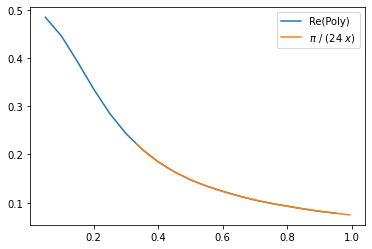

In [17]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
p0 = [run_ancilla_free_qsp(t, angles, basis="X", simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]
plt.plot(xs, amp, label="Re(Poly)")

kappa = 3
x = np.arange(1 / kappa, 1.0, 0.01)
y = [np.sqrt(np.pi) / (4 * 6 * x) for x in x]
plt.plot(x, y, label="1/x")
plt.legend(["Re(Poly)", "$\pi$ / (24 $x$)"])
plt.show()

### $\mathcal{A}(\theta) = \mathcal{A}(-\theta)$ and $\mathcal{C}(\theta) = \mathcal{C}(-\theta)$

In [18]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
amps = [run_ancilla_free_qsp(t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])
amps = [run_ancilla_free_qsp(- t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])

[(0.485+0j), (0.446-0j), (0.393+0j), (0.336-0j), (0.285-0j), (0.243-0j), (0.211-0j), (0.185-0j), (0.164-0j), (0.147-0j), (0.134-0j), (0.123-0j), (0.114-0j), (0.105-0j), (0.098-0j), (0.093-0j), (0.087-0j), (0.082+0j), (0.078-0j)]
[(0.485+0j), (0.446+0j), (0.393+0j), (0.336+0j), (0.285+0j), (0.243+0j), (0.211+0j), (0.185+0j), (0.164+0j), (0.147+0j), (0.134+0j), (0.123+0j), (0.114+0j), (0.105+0j), (0.098+0j), (0.093+0j), (0.087+0j), (0.082-0j), (0.078+0j)]


## Single-ancilla QSP
QSP phases for even polynomial function

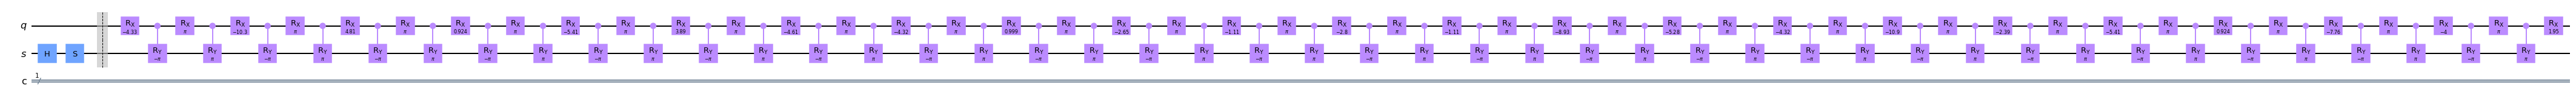

In [19]:
sa_angles = to_single_ancilla_qsp_angles(angles)
qc = single_ancilla_qsp_circuit(np.pi / 2, sa_angles)
qc.draw(output="mpl", fold=-1)

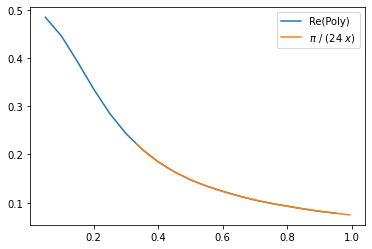

In [20]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - np.arccos(xs)
p0 = [run_single_ancilla_qsp(t, sa_angles, simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]
plt.plot(xs, amp, label="Re(Poly)")

kappa = 3
x = np.arange(1 / kappa, 1.0, 0.01)
y = [np.sqrt(np.pi) / (4 * 6 * x) for x in x]
plt.plot(x, y, label="1/x")
plt.legend(["Re(Poly)", "$\pi$ / (24 $x$)"])
plt.show()

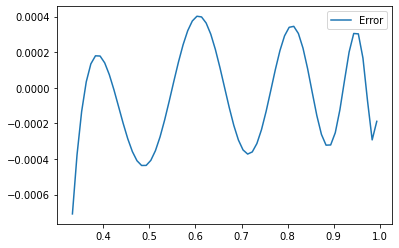

In [21]:
xs = np.arange(1 / kappa, 1.0, 0.01)
ts = - np.arccos(xs)
p0 = [run_single_ancilla_qsp(t, sa_angles, simulator="aer_simulator_statevector") for t in ts]
amp = np.array([np.sqrt(p) for p in p0])
fs = np.sqrt(np.pi) / (4 * 6 * xs)
plt.plot(xs, amp - fs, label="Re(Poly)")
plt.legend(["Error"])
plt.show()

## Ancilla-free QSP
$f(x)$ is an even polynomial function that $\epsilon$-approximates 
$$f(x) \approx \frac{\mathrm{erf}(\beta x)}{2 \kappa x} \approx \frac{1}{2 \kappa x},$$
for $\kappa = 8$ and $\epsilon = 10^{-2}, \beta = 13.1598108570655$.

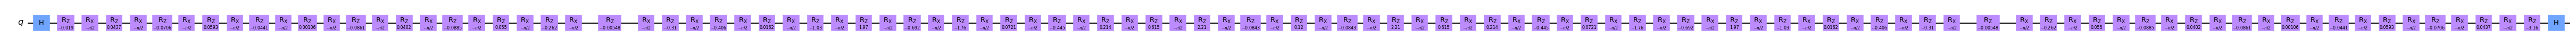

In [22]:
# kappa = 8
# eps = 1e-2
# f(x) = 1 / (2 * kappa * x)
# approximated by
# f(x) = erf(beta * x) / (2 * kappa * x)
# beta = 13.1598108570655

angles = [
    1.580297653129814e+00, -2.183970335983414e-02, 3.531039623029616e-02, 
    -2.963453820835727e-02, 2.203134178113574e-02, -5.315807673466162e-04, 
    4.306026715870437e-02, -2.008022043623600e-02, 4.427250807007087e-02, 
    -2.750639713505947e-02, 1.312413898658997e-01, 2.741609536111113e-03, 
    1.550195031565832e-01, 2.029209739346619e-01, -8.104869399920599e-03, 
    5.138551495694907e-01, -9.862026952595644e-01, 3.458077529112235e-01, 
    8.781247623438849e-01, -3.606303704516873e-02, 2.223160973085850e-01, 
    -1.067838051600757e-01, -3.074084357447426e-01, -1.105413652260848e+00, 
    4.216917975084344e-02, -6.004497536656759e-02, 4.216917975963808e-02, 
    -1.105413652261079e+00, -3.074084357474234e-01, -1.067838051714909e-01, 
    2.223160972985473e-01, -3.606303704117078e-02, 8.781247623444431e-01, 
    3.458077529058556e-01, -9.862026952553345e-01, 5.138551495789044e-01, 
    -8.104869397393768e-03, 2.029209739277027e-01, 1.550195031589094e-01, 
    2.741609539019295e-03, 1.312413898635375e-01, -2.750639713351074e-02, 
    4.427250807047904e-02, -2.008022043641176e-02, 4.306026715892532e-02, 
    -5.315807676130529e-04, 2.203134178133675e-02, -2.963453820821194e-02, 
    3.531039623018362e-02, -2.183970335981388e-02, 9.501326334951621e-03,
]

qc = ancilla_free_qsp_circuit(np.pi / 2, angles, basis="X")
qc.draw(output="mpl", fold=-1)

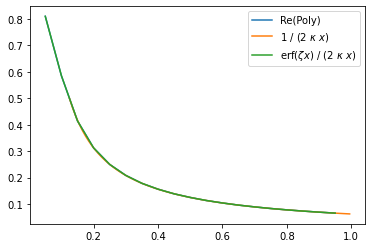

In [23]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
p0 = [run_ancilla_free_qsp(t, angles, basis="X", simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]
plt.plot(xs, amp, label="Re(Poly)")

kappa = 8
x = np.arange(1 / kappa, 1.0, 0.01)
y = [1 / (2 * kappa * x) for x in x]
plt.plot(x, y, label="1/x")

# f(x) = erf(beta * x) / (2 * kappa * x)
beta = 13.1598108570655
z = erf(beta * xs) / (2 * kappa * xs)
plt.plot(xs, z, label="1/x")

plt.legend(["Re(Poly)", "1 / (2 $\kappa$ $x$)", "erf($\zeta x$) / (2 $\kappa$ $x$)"])
plt.show()

### $\mathcal{A}(\theta) = \mathcal{A}(-\theta)$ and $\mathcal{C}(\theta) = \mathcal{C}(-\theta)$

In [24]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
amps = [run_ancilla_free_qsp(t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])
amps = [run_ancilla_free_qsp(- t, angles, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])

[(0.81-0j), (0.585-0j), (0.415-0j), (0.312+0j), (0.25+0j), (0.209+0j), (0.178+0j), (0.156+0j), (0.139+0j), (0.125+0j), (0.113+0j), (0.104+0j), (0.096-0j), (0.089-0j), (0.083+0j), (0.078-0j), (0.074+0j), (0.069-0j), (0.066+0j)]
[(0.81+0j), (0.585+0j), (0.415+0j), (0.312-0j), (0.25-0j), (0.209-0j), (0.178-0j), (0.156-0j), (0.139-0j), (0.125-0j), (0.113-0j), (0.104-0j), (0.096+0j), (0.089+0j), (0.083-0j), (0.078+0j), (0.074-0j), (0.069+0j), (0.066-0j)]


## Single-ancilla QSP
QSP phases for even polynomial function

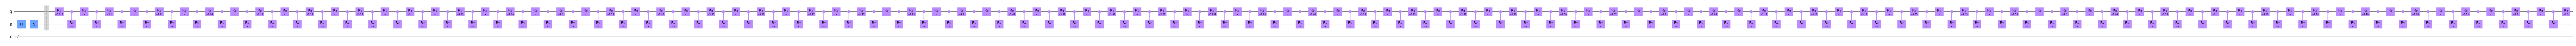

In [25]:
sa_angles = to_single_ancilla_qsp_angles(angles)
qc = single_ancilla_qsp_circuit(np.pi / 2, sa_angles)
qc.draw(output="mpl", fold=-1)

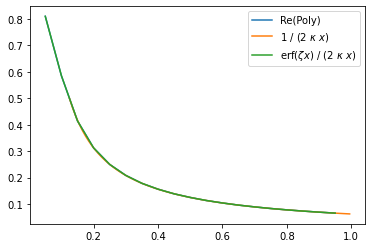

In [26]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - np.arccos(xs)
p0 = [run_single_ancilla_qsp(t, sa_angles, simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]
plt.plot(xs, amp, label="Re(Poly)")

kappa = 8
x = np.arange(1 / kappa, 1.0, 0.01)
y = [1 / (2 * kappa * x) for x in x]
plt.plot(x, y, label="1/x")

# f(x) = erf(beta * x) / (2 * kappa * x)
beta = 13.1598108570655
z = erf(beta * xs) / (2 * kappa * xs)
plt.plot(xs, z, label="1/x")

plt.legend(["Re(Poly)", "1 / (2 $\kappa$ $x$)", "erf($\zeta x$) / (2 $\kappa$ $x$)"])
plt.show()

## LCU of odd and even polynomial functions

In [27]:
omega_odd = [
    -1.538025683625566242e-01,
    -4.519084276311081894e+00,
    8.211333411653445324e+00,
    1.265142840122965628e+00,
    -1.876449813466793737e+00,
    -7.496629856295466077e+00,
    4.905693684458291237e+00,
    1.416993758432312012e+00,
]

omega_even = [
    2.220341503859678767e+00,
    -3.167801101570496325e+00,
    -2.464682189384485248e-03,
    1.570337510676358184e+00,
    3.139127971400032191e+00,
    -2.620844798001673373e-02,
    -2.492047476525073524e+00,
]

### Ancilla-free QSP of odd function

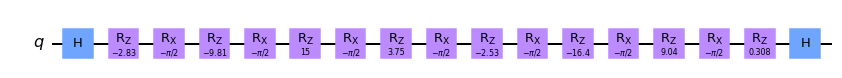

In [28]:
qc = ancilla_free_qsp_circuit(np.pi / 2, omega_odd, basis="X")
qc.draw(output="mpl", fold=-1)

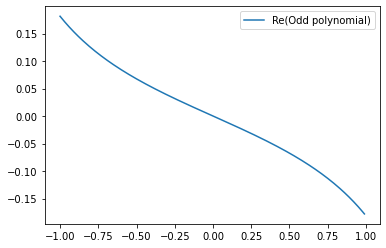

In [29]:
xs = np.arange(-1.0, 1.0, 0.01)
ts = - 2 * np.arccos(xs)

p0 = [run_ancilla_free_qsp(t, omega_odd, basis="X", simulator="aer_simulator_statevector") for t in ts]
amp = [- np.sqrt(p) if x > 0 else np.sqrt(p) for p, x in zip(p0, xs)]

plt.plot(xs, amp, label="Re(Poly)")
plt.legend(["Re(Odd polynomial)"])
plt.show()

#### $\mathcal{A}(\theta) = \mathcal{A}(-\theta)$ and $\mathcal{C}(\theta) = \mathcal{C}(-\theta)$

In [30]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
amps = [run_ancilla_free_qsp(t, omega_odd, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])
amps = [run_ancilla_free_qsp(- t, omega_odd, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])

[(-0.006-0j), (-0.012-0j), (-0.019-0j), (-0.025-0j), (-0.032-0j), (-0.038-0j), (-0.045-0j), (-0.052-0j), (-0.06-0j), (-0.068-0j), (-0.076-0j), (-0.084-0j), (-0.093-0j), (-0.103-0j), (-0.113-0j), (-0.125-0j), (-0.137-0j), (-0.15-0j), (-0.165-0j)]
[(-0.006+0j), (-0.012+0j), (-0.019+0j), (-0.025+0j), (-0.032+0j), (-0.038+0j), (-0.045+0j), (-0.052+0j), (-0.06+0j), (-0.068+0j), (-0.076+0j), (-0.084+0j), (-0.093+0j), (-0.103+0j), (-0.113+0j), (-0.125+0j), (-0.137+0j), (-0.15+0j), (-0.165+0j)]


### Ancilla-free QSP of even function

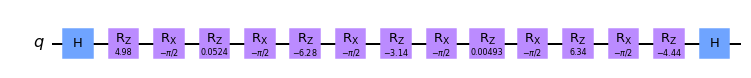

In [31]:
qc = ancilla_free_qsp_circuit(np.pi / 2, omega_even, basis="X")
qc.draw(output="mpl", fold=-1)

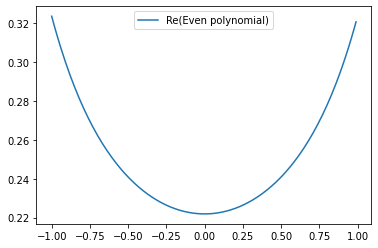

In [32]:
xs = np.arange(-1.0, 1.0, 0.01)
ts = - 2 * np.arccos(xs)

p0 = [run_ancilla_free_qsp(t, omega_even, basis="X", simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]

plt.plot(xs, amp, label="Re(Poly)")
plt.legend(["Re(Even polynomial)"])
plt.show()

#### $\mathcal{A}(\theta) = \mathcal{A}(-\theta)$ and $\mathcal{C}(\theta) = \mathcal{C}(-\theta)$

In [33]:
xs = np.arange(0.05, 1.0, 0.05)
ts = - 2 * np.arccos(xs)
amps = [run_ancilla_free_qsp(t, omega_even, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])
amps = [run_ancilla_free_qsp(- t, omega_even, basis="X", simulator="unitary_simulator") for t in ts]
print([a.data[0][0] for a in amps])

[(0.222+0j), (0.223+0j), (0.223+0j), (0.225+0j), (0.226-0j), (0.228+0j), (0.231+0j), (0.234+0j), (0.237-0j), (0.241+0j), (0.245+0j), (0.25+0j), (0.256+0j), (0.262+0j), (0.27-0j), (0.278+0j), (0.287+0j), (0.298+0j), (0.31+0j)]
[(0.222+0j), (0.223+0j), (0.223+0j), (0.225+0j), (0.226+0j), (0.228+0j), (0.231+0j), (0.234+0j), (0.237+0j), (0.241+0j), (0.245+0j), (0.25+0j), (0.256+0j), (0.262+0j), (0.27+0j), (0.278+0j), (0.287+0j), (0.298+0j), (0.31+0j)]


### LCU of odd and even functions

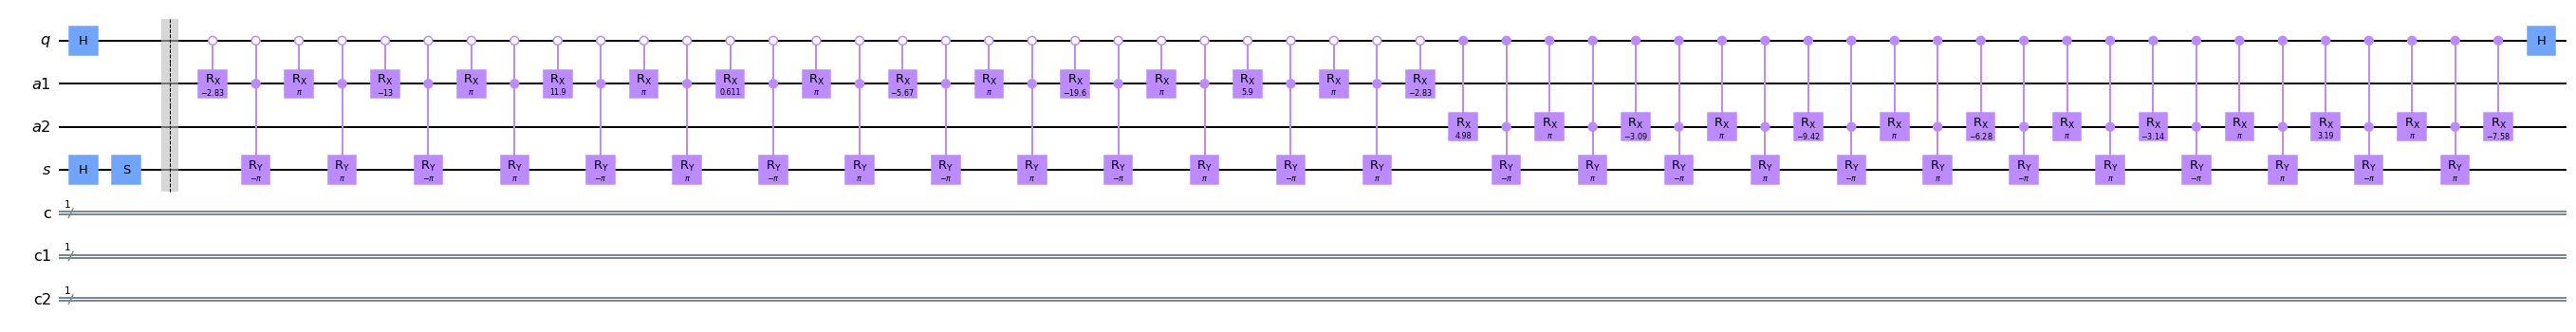

In [34]:
qc = lcu_circuit(
    np.pi / 2, 
    to_single_ancilla_qsp_angles(omega_odd), 
    to_single_ancilla_qsp_angles(omega_even), 
    add_measurements=False,
)
qc.draw(output="mpl", fold=-1)

In [35]:
def f(x):
    kappa = 3.5058891673041943
    delta = 1 / (100 * kappa)
    xl = 1 / kappa - delta
    xr = 1 + delta
    w = (xr - xl) * x + (xr + xl)
    return 1 / (2 * kappa * w)

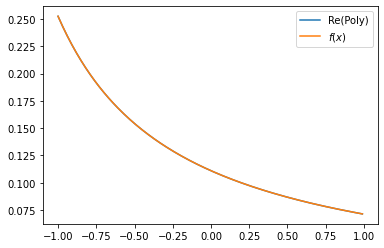

In [36]:
xs = np.arange(-1.0, 1.0, 0.01)
ts = - np.arccos(xs)

sa_omega_odd = to_single_ancilla_qsp_angles(omega_odd)
sa_omega_even = to_single_ancilla_qsp_angles(omega_even)

p0 = [run_lcu(t, sa_omega_odd, sa_omega_even, simulator="aer_simulator_statevector") for t in ts]
amp = [np.sqrt(p) for p in p0]

plt.plot(xs, amp, label="Re(Poly)")
plt.plot(xs, f(xs), label="1 / x")

plt.legend(["Re(Poly)", "$f(x)$"])
plt.show()

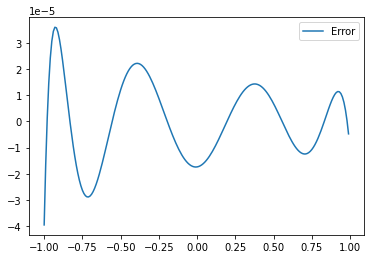

In [37]:
plt.plot(xs, amp - f(xs), label="Re(Poly)")
plt.legend(["Error"])
plt.show()